# Dog vs Cat Classification Transfer Learning

# Workflow

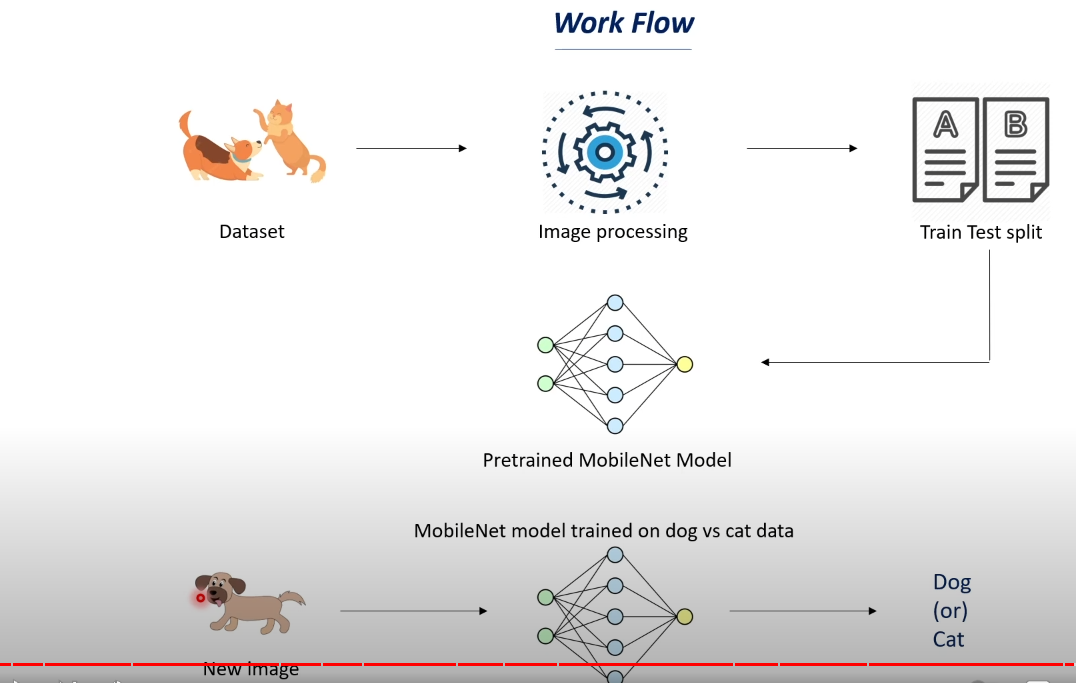

Extracting Dataset using Kaggle API

In [1]:
# installing the Kaggle library
!pip install kaggle

In [5]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing the Dog vs Cat Dataset from Kaggle

In [6]:
# Kaggle api
!kaggle competitions download -c dogs-vs-cats

 98% 793M/812M [00:08<00:00, 53.6MB/s]
100% 812M/812M [00:08<00:00, 95.7MB/s]


In [7]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [8]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [9]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [10]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


Printing the name of images

In [11]:
file_names = os.listdir('/content/train/')
print(file_names)

['dog.11782.jpg', 'dog.7564.jpg', 'dog.2092.jpg', 'cat.663.jpg', 'dog.809.jpg', 'dog.6821.jpg', 'dog.7331.jpg', 'dog.8401.jpg', 'cat.5069.jpg', 'cat.3120.jpg', 'dog.10557.jpg', 'dog.1942.jpg', 'dog.11475.jpg', 'cat.6680.jpg', 'cat.8245.jpg', 'dog.12070.jpg', 'dog.12071.jpg', 'dog.1722.jpg', 'cat.7629.jpg', 'dog.1786.jpg', 'cat.3908.jpg', 'dog.8387.jpg', 'cat.553.jpg', 'cat.8551.jpg', 'cat.3753.jpg', 'dog.4516.jpg', 'cat.10215.jpg', 'cat.2176.jpg', 'dog.7084.jpg', 'cat.10266.jpg', 'dog.7266.jpg', 'dog.6744.jpg', 'dog.9245.jpg', 'cat.4160.jpg', 'dog.317.jpg', 'dog.5488.jpg', 'dog.8655.jpg', 'dog.6456.jpg', 'dog.6956.jpg', 'dog.8998.jpg', 'dog.64.jpg', 'dog.266.jpg', 'dog.8968.jpg', 'dog.323.jpg', 'cat.9623.jpg', 'cat.3008.jpg', 'cat.12132.jpg', 'cat.1761.jpg', 'cat.10475.jpg', 'cat.2933.jpg', 'dog.2808.jpg', 'dog.12477.jpg', 'dog.3229.jpg', 'dog.9616.jpg', 'cat.11882.jpg', 'dog.8354.jpg', 'dog.501.jpg', 'cat.6599.jpg', 'dog.4982.jpg', 'dog.1076.jpg', 'dog.1529.jpg', 'cat.6644.jpg', 'cat.

Importing the Dependencies

In [12]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying the images of dogs and cats

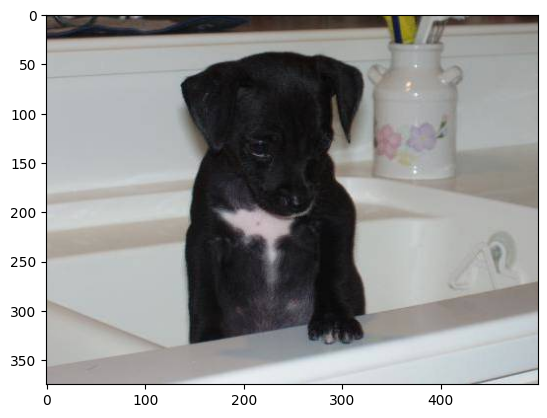

In [13]:
# display dog image
img = mpimg.imread('/content/train/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

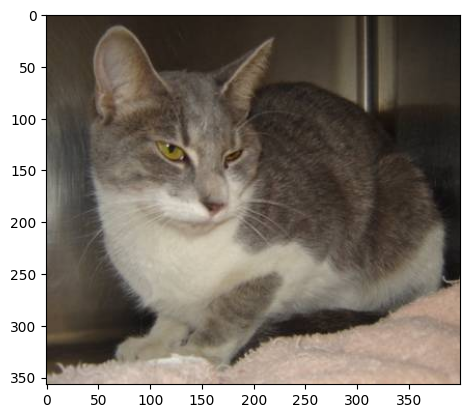

In [14]:
# display cat image
img = mpimg.imread('/content/train/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()

In [15]:
file_names = os.listdir('/content/train/')

for i in range(5):

  name = file_names[i]
  print(name[0:3])



dog
dog
dog
cat
dog


In [16]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


Resizing all the images

In [17]:
#creating a directory for resized images
os.mkdir('/content/image resized')

In [21]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

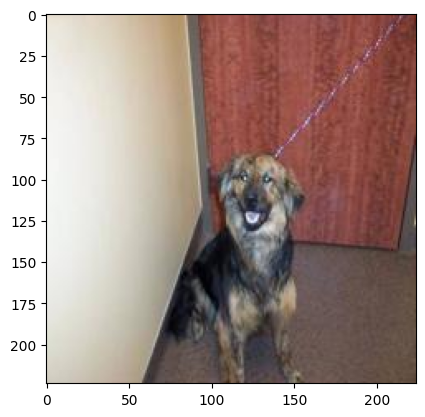

In [25]:
# display resized dog image
img = mpimg.imread('/content/image resized/dog.11782.jpg')
imgplt = plt.imshow(img)
plt.show()

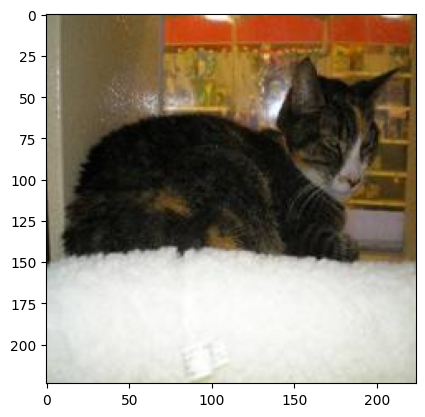

In [26]:
# display resized cat image
img = mpimg.imread('/content/image resized/cat.663.jpg')
imgplt = plt.imshow(img)
plt.show()

**Creating labels for resized images of dogs and cats**

Cat --> 0

Dog --> 1

In [23]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [24]:
print(filenames[0:5])
print(len(filenames))

['dog.11782.jpg', 'dog.7564.jpg', 'dog.2092.jpg', 'cat.663.jpg', 'dog.809.jpg']
2000


In [27]:
print(labels[0:5])
print(len(labels))

[1, 1, 1, 0, 1]
2000


In [28]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 983 1017]


Converting all the resized images to numpy arrays

In [29]:
import cv2
import glob

In [30]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [31]:
print(dog_cat_images)

[[[[203 216 224]
   [203 216 224]
   [203 216 224]
   ...
   [ 48  56 123]
   [ 41  53 125]
   [ 36  49 123]]

  [[207 220 228]
   [207 220 228]
   [207 220 228]
   ...
   [ 53  61 128]
   [ 46  56 126]
   [ 36  50 122]]

  [[212 225 233]
   [212 225 233]
   [211 224 232]
   ...
   [ 51  60 124]
   [ 46  57 125]
   [ 34  46 116]]

  ...

  [[191 203 207]
   [192 204 208]
   [193 205 209]
   ...
   [ 60  74  93]
   [ 57  71  90]
   [ 55  69  88]]

  [[191 203 207]
   [191 203 207]
   [192 204 208]
   ...
   [ 58  72  91]
   [ 56  70  89]
   [ 54  68  87]]

  [[190 202 206]
   [191 203 207]
   [191 203 207]
   ...
   [ 64  78  97]
   [ 62  76  95]
   [ 60  74  93]]]


 [[[ 27  30  35]
   [ 28  31  36]
   [ 29  32  37]
   ...
   [ 26 103 142]
   [ 22  96 132]
   [ 28 101 133]]

  [[ 26  29  34]
   [ 26  29  34]
   [ 27  30  35]
   ...
   [ 37 113 155]
   [ 42 116 152]
   [ 51 124 156]]

  [[ 27  30  35]
   [ 27  30  35]
   [ 26  29  34]
   ...
   [ 44 118 160]
   [ 52 123 160]
   [ 59 130

In [32]:
type(dog_cat_images)

numpy.ndarray

In [33]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [34]:
X = dog_cat_images
Y = np.asarray(labels)

**Train Test Split**

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [36]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 --> training images

400 --> test images

In [37]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [38]:
print(X_train_scaled)

[[[[0.27058824 0.30588235 0.36078431]
   [0.27058824 0.30588235 0.36078431]
   [0.2627451  0.30588235 0.36078431]
   ...
   [0.61176471 0.6627451  0.7254902 ]
   [0.60784314 0.65882353 0.72156863]
   [0.60784314 0.65882353 0.72156863]]

  [[0.27058824 0.30588235 0.36078431]
   [0.27058824 0.30588235 0.36078431]
   [0.2627451  0.30588235 0.36078431]
   ...
   [0.61176471 0.6627451  0.7254902 ]
   [0.61176471 0.6627451  0.7254902 ]
   [0.60784314 0.65882353 0.72156863]]

  [[0.2745098  0.30980392 0.36470588]
   [0.2745098  0.30980392 0.36470588]
   [0.26666667 0.30980392 0.36470588]
   ...
   [0.61568627 0.66666667 0.72941176]
   [0.61176471 0.6627451  0.7254902 ]
   [0.61176471 0.6627451  0.7254902 ]]

  ...

  [[0.30196078 0.23921569 0.28235294]
   [0.29411765 0.23137255 0.2745098 ]
   [0.30588235 0.23921569 0.29019608]
   ...
   [0.50588235 0.5372549  0.60392157]
   [0.50588235 0.53333333 0.6       ]
   [0.50588235 0.53333333 0.6       ]]

  [[0.31372549 0.24313725 0.29411765]
   [0.3

**Building the Neural Network**

In [49]:
import tensorflow as tf
import tensorflow_hub as hub

In [50]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [51]:
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [60]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [61]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 60s 1s/step - loss: 0.0116 - acc: 0.9987
Epoch 2/5
50/50 [==============================] - 56s 1s/step - loss: 0.0085 - acc: 0.9994
Epoch 3/5
50/50 [==============================] - 56s 1s/step - loss: 0.0055 - acc: 1.0000
Epoch 4/5
50/50 [==============================] - 58s 1s/step - loss: 0.0045 - acc: 1.0000
Epoch 5/5
50/50 [==============================] - 57s 1s/step - loss: 0.0039 - acc: 1.0000


In [54]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 17s 1s/step - loss: 0.0380 - acc: 0.9875
Test Loss = 0.037983790040016174
Test Accuracy = 0.987500011920929


**Predictive System**

Path of the image to be predicted: /content/dog.PNG


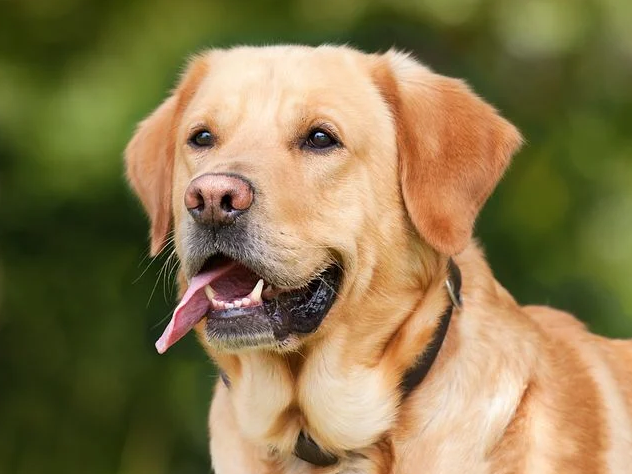

1/1 [==============================] - 1s 580ms/step
[[-2.1193283 -1.0073524]]
1
The image represents a Dog


In [45]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/cat2.PNG


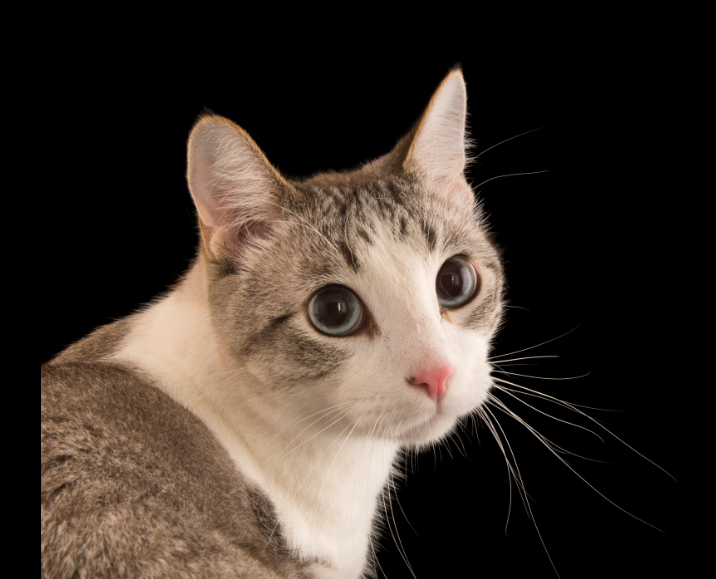

1/1 [==============================] - 53s 53s/step
[[ 5.3814664 -5.9651327]]
0
The image represents a Cat


In [59]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/dog3.PNG


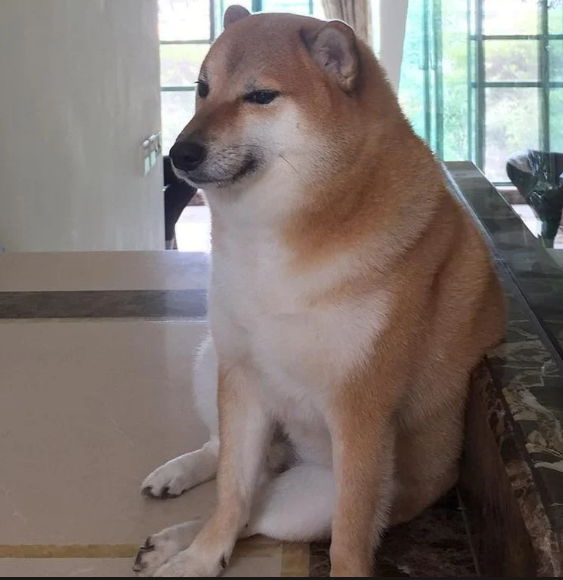

1/1 [==============================] - 1s 866ms/step
[[-1.8846887  3.3040068]]
1
The image represents a Dog


In [62]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/cat3.PNG


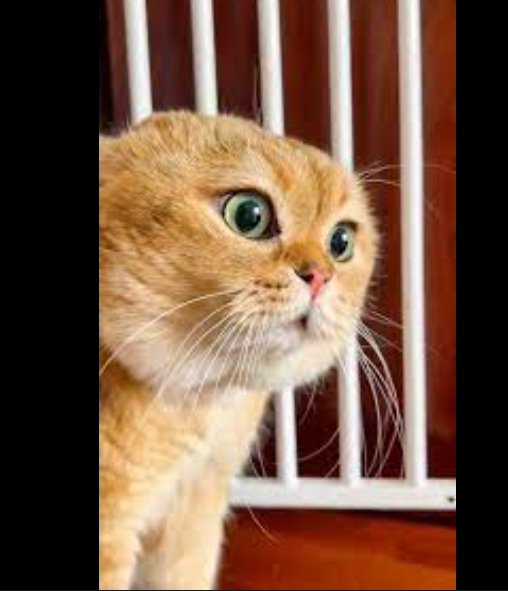

1/1 [==============================] - 0s 58ms/step
[[ 4.908366  -3.6663659]]
0
The image represents a Cat


In [63]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')